In [2]:
# import necessary packages
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


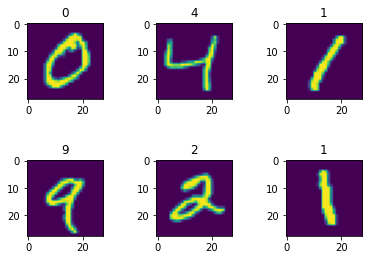

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load dataset
# show samples of the dataset
fig = plt.figure() # new figure object
fig.subplots_adjust(hspace=0.7, wspace=0.7) # adjust horizontal and vertial spaces
for i in range(1, 7): # plot samples
    ax = fig.add_subplot(2, 3, i)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

In [4]:
# more data exploration
print('trainig tensor shape {}'.format(x_train.shape))
print('Test data shape {}'.format(x_test.shape))
print('label tensor shape {} '.format(y_train.shape))

trainig tensor shape (60000, 28, 28)
Test data shape (10000, 28, 28)
label tensor shape (60000,) 


In [13]:
# data preprocessing 

# Flatten the images so that neural network can process
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# Convert y to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# neural network parameters to tune for best performance

1. number of hidden layers (many layers causes overfitting , very few layers underfitting)
2. number of neurons per layers (many neurons overfitting , very few underfitting)
3. activation function (you may change activation function but relu and sigmoid are good for many problems)
4. loss function (choose prober / sutiable loss function)
5. optimizer learning rate (very large rate >>> model may overshoot global minimum , and very low value model may stuck is local minimum)
6. batch size
7. number of epoches
8. also make sure features are scalled this has huge effect on performance


In [16]:
# build the network
# create model
model = Sequential() # because our model can be modeled as sequence of layers
# input layer
model.add(Dense(units=image_vector_size//2,
                input_shape=x_train[0].shape,
                activation='sigmoid'))

# first hidden layer with image_vector_size*2 nodes
model.add(Dense(units=image_vector_size*2,
                activation='sigmoid'))
# second hidden layer with image_vector_size*4  nodes
model.add(Dense(image_vector_size*4,
               activation='sigmoid'))
# third hidden layer with image_vector_size*8 nodes
model.add(Dense(image_vector_size*8,
               activation='sigmoid'))
# output layer
model.add(Dense(num_classes,
                activation='softmax')) # softmax maps values into propability distribution 
                                        # example softmax_inputs = [2, 3, 5, 6] >>> Softmax Function Output :: [ 0.01275478  0.03467109  0.25618664  0.69638749]
# Compile model
sgd = optimizers.SGD(lr=4) # lr : learning rate , SGD : gradient descent
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [17]:
EPOCHES=2 # number of iterations
BATCH_SIZE=128 
history=model.fit(x_train, y_train,
                  validation_data=(x_test, y_test), 
                  epochs=EPOCHES, 
                  batch_size=BATCH_SIZE,
                  verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 428s 7ms/step - loss: 0.1800 - accuracy: 0.0988 - val_loss: 0.1804 - val_accuracy: 0.0980
Epoch 2/2
60000/60000 [==============================] - 378s 6ms/step - loss: 0.1803 - accuracy: 0.0987 - val_loss: 0.1804 - val_accuracy: 0.0980


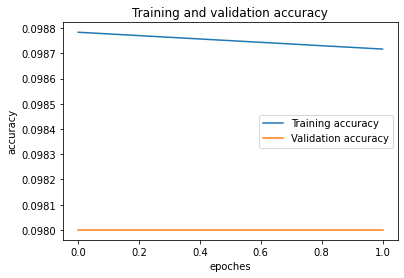

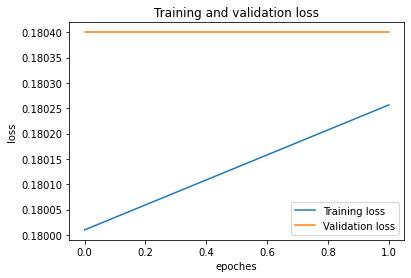

In [18]:
# Visualize loss and accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.legend()

In [20]:
# model evaluation
test_eval = model.evaluate(x_test, y_test)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 18s 2ms/step
Test loss: 0.1804000042915344
Test accuracy: 0.09799999743700027


Text(0.5, 1.0, 'Confusion Matrix')

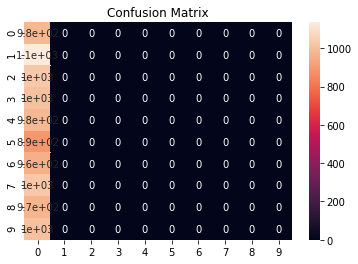

In [24]:
# confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
ax= plt.subplot()
predictions=model.predict(x_test)
cm = pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1)), range(10),range(10))

sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_title('Confusion Matrix')